# Machine Learning Classification of Kidney Data (Supervised and Unsupervised)

    THIS IS THE MOST RECENT VERSION OF THIS FILE

In [1]:
#Import necessary packages 
from sklearn import metrics 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns

In [2]:
#Set random seed for repeatable results
np.random.seed(42)

In [3]:
#Import pre-processed data
df = pd.read_csv("new_model.csv")
#Inspect the first few rows of the data
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [4]:
#Check if there are NA values in dataframe
df.isnull().values.any()

False

In [5]:
# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Supervised Learning Methods

### Random Forest

In [7]:
#Instantiating random forest classifier model object and fitting the training data to model
rf_model = RandomForestClassifier()  
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
#Obtaining predictions based on the testing data 
y_pred_rf = rf_model.predict(X_test) 

In [9]:
#Evaluating the model using accuracy metrics

#Precision score 
print("Precision:",metrics.precision_score(y_test, y_pred_rf))

# Recall score
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

#ROC AUC score
print("ROC AUC score:", roc_auc_score(y_test, y_pred_rf))

#Accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf)) 

Precision: 1.0
Recall: 0.9807692307692307
ROC AUC score: 0.9903846153846154
Accuracy: 0.9875


In [10]:
#Hyperparameter tuning
#Define parameter list used to search for best hyperparameters
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Instantiate a RandomizedSearchCV object to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the training data 
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146d2b290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146d00410>})

In [11]:
# Create a variable for the model with the best hyperparamters
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 149}


In [12]:
#Instantiate another random forest classifier with the best hyperparameters and fit the model to the training data 
rf_model_best = RandomForestClassifier(n_estimators=149,max_depth=5)  
rf_model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=149)

In [13]:
#Obtain predictions based in the test data for the random forest model with the best hyperparameters 
y_pred_rf_best = rf_model_best.predict(X_test) 

In [14]:
#Evaluating the model with the best hyperparameters using accuracy metrics

#Precision score 
print("Precision:",metrics.precision_score(y_test, y_pred_rf_best))

# Recall score
print("Recall:",metrics.recall_score(y_test, y_pred_rf_best))

#ROC AUC score
print("ROC AUC score:", roc_auc_score(y_test, y_pred_rf_best))

#Accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf_best)) 

Precision: 1.0
Recall: 1.0
ROC AUC score: 1.0
Accuracy: 1.0


In [15]:
#Cross-validation of random forest model with best hyperparameters 
#Calculate the cross-validation scores for each fold
rf_cv_scores = cross_val_score(rf_model_best, X, y, cv=5)

#Print the cross-validation scores of each fold 
print("Accuracy for each fold:", rf_cv_scores)

# Calculate and print the mean cross-validation score 
print("Mean Accuracy:", np.mean(rf_cv_scores))

Accuracy for each fold: [0.9875 1.     0.975  1.     1.    ]
Mean Accuracy: 0.9925


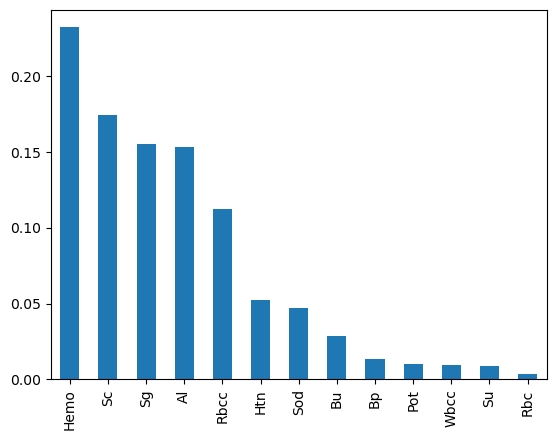

In [16]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [17]:
#Instantiate StandardScaler class object to scale training and testing data for SVM and KNN classifiers 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM

In [18]:
#SVM Model
#Create a SVM classifier model object 
svm_model = svm.SVC(kernel='linear') 

#Train the model using the training sets
svm_model.fit(X_train_scaled, y_train)

#Predict the response for the scaled test dataset
y_pred_svm = svm_model.predict(X_test_scaled)

In [19]:
#Evaluating the SVM model using accuracy metrics

#Precision score 
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

# Recall score
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

#ROC AUC score
print("ROC AUC score:", roc_auc_score(y_test, y_pred_svm))

#Accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm)) 

Precision: 0.9811320754716981
Recall: 1.0
ROC AUC score: 0.9821428571428572
Accuracy: 0.9875


In [20]:
#Instantiate second StandardScaler class object to scale features columns X for cross-validation
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)

In [21]:
#Cross validation of SVM Model
svm_cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold:", svm_cv_scores)

# Calculate and print the mean accuracy
print("Mean Accuracy:", np.mean(svm_cv_scores))

Accuracy for each fold: [0.975  0.975  0.975  0.9625 0.975 ]
Mean Accuracy: 0.9724999999999999


### KNN

In [22]:
#Instantiate a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

#Fit to the KNN model using the the scaled X training data 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Predict the response for the scaled test data
y_pred_knn = knn.predict(X_test_scaled)

In [24]:
#Evaluating the KNN model using accuracy metrics

#Precision score 
print("Precision:",metrics.precision_score(y_test, y_pred_knn))

# Recall score
print("Recall:",metrics.recall_score(y_test, y_pred_knn))

#ROC AUC score
print("ROC AUC score:", roc_auc_score(y_test, y_pred_knn))

#Accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn)) 

Precision: 0.9807692307692307
Recall: 0.9807692307692307
ROC AUC score: 0.9725274725274726
Accuracy: 0.975


In [25]:
k_values = [i for i in range (1,31)]
knn_cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=5)
    knn_cv_scores.append(np.mean(score))

/Users/katieselvaraj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katieselvaraj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Accuracy Score')

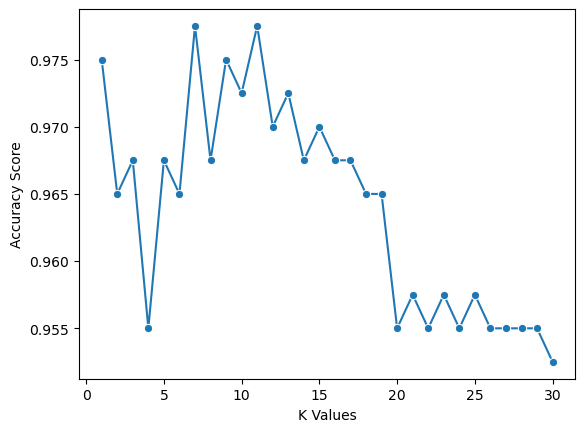

In [26]:
sns.lineplot(x = k_values, y = knn_cv_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [27]:
best_index_k = np.argmax(knn_cv_scores)
best_k = k_values[best_index_k]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred_knn_best = knn.predict(X_test_scaled)

In [29]:
#Evaluating the KNN model with the best number of K-nearest neighbors using accuracy metrics

#Precision score 
print("Precision:",metrics.precision_score(y_test, y_pred_knn_best))

# Recall score
print("Recall:",metrics.recall_score(y_test, y_pred_knn_best))

#ROC AUC score
print("ROC AUC score:", roc_auc_score(y_test, y_pred_knn_best))

#Accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn_best)) 

Precision: 1.0
Recall: 1.0
ROC AUC score: 1.0
Accuracy: 1.0


In [30]:
#Cross validation of KNN model with best number of K-nearest neighbors
knn_cv_scores = cross_val_score(knn, X_scaled, y, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold:", knn_cv_scores)

# Calculate and print the mean accuracy
print("Mean Accuracy:", np.mean(knn_cv_scores))

Accuracy for each fold: [0.9875 1.     0.9875 0.95   0.9625]
Mean Accuracy: 0.9775


## Unsupervised Learning Methods

### PCA

In [32]:
#All data except Class data (target)
#df1 = df.iloc[:, :-1]
#df1.head()

In [33]:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df1)

In [34]:
#Instantiate PCA model 
pca = PCA(n_components=2)

In [35]:
#Fit and transform scaled feature column data (X) to the PCA model
X_pca = pca.fit_transform(X_scaled)

In [36]:
#Prints PC1 loadings
print(pca.components_[:, 0])

#Print scores of the first data point
print(X_pca[0, :])

[ 0.1785287  -0.08201316]
[-0.67917146  0.04249688]


In [37]:
#Create dataframe with principal component values for each of the samples
principal_comp_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
principal_comp_df.head()

,principal component 1,principal component 2
0,-0.679171,0.042497
1,-0.361528,-0.052285
2,1.132683,-1.325864
3,2.901598,0.083327
4,0.180502,-0.581785


In [38]:
#Explained variance ratio provides the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace
print(pca.explained_variance_ratio_)

[0.32885225 0.11177842]


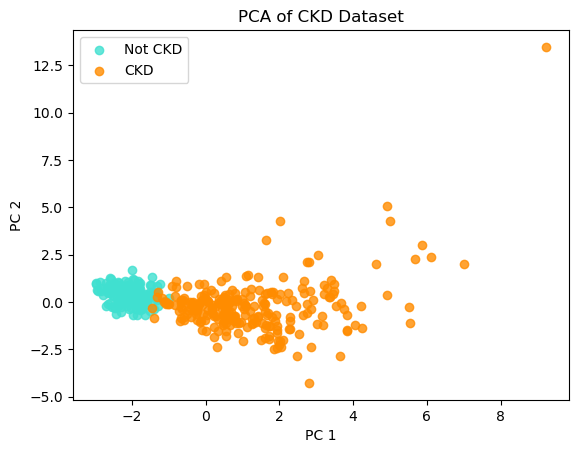

In [39]:
#Define target labels in dataset 
target_names = ['Not CKD', 'CKD']
colors = ['turquoise', 'darkorange']

#Create a scatter plot using PC 1 and PC 2 with data points labeled with either "Not CKD" and "CKD" for better visualization of the data as explained by PC's 1 and 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of CKD Dataset')
plt.xlabel("PC 1")
plt.ylabel("PC 2");

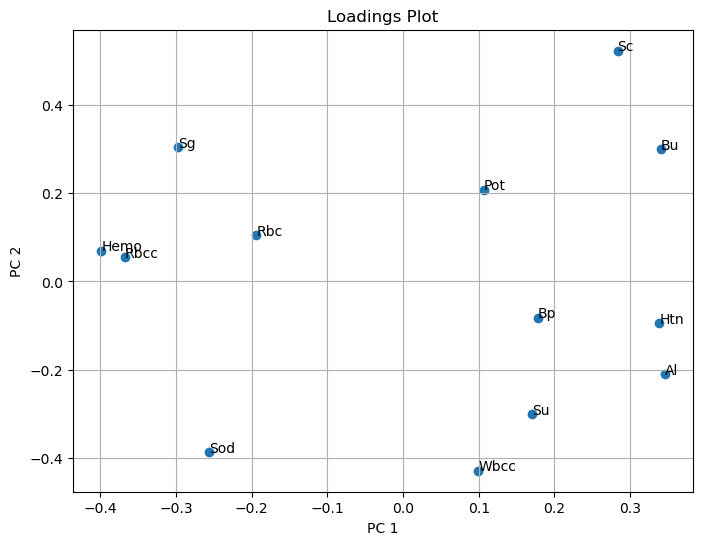

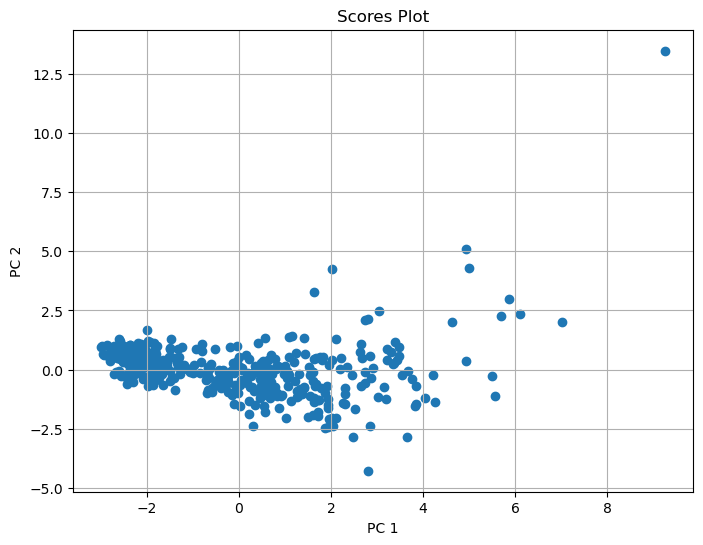

In [40]:
# Create loadings plot with variable names
plt.figure(figsize=(8, 6))
plt.scatter(pca.components_[0, :], pca.components_[1, :])
for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.text(x, y, X.columns[i], fontsize='10')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Loadings Plot')
plt.grid(True)
plt.show()

# Create scores plot 
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scores Plot')
plt.grid(True)
plt.show()